#### Actividad: Actividades de Regresion
#### Nombre: Luis Rodolfo Bojorquez Pineda
#### Matricula: A01250513

# Ejercicio 1

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('./Archivos/crime_data.csv')
data.drop(['MR', 'W', 'State'], axis=1, inplace=True)


#### Nota 1: Las variables con las que vas a trabajar depende del último número de tu matrícula de acuerdo a la siguiente lista:
3 - Variable dependiente VR, variables independientes M, H, S y P

In [38]:
# Variables predictoras y variable de respuesta
X = data[['M', 'H', 'S', 'P']]
y = data['VR']

#### 1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

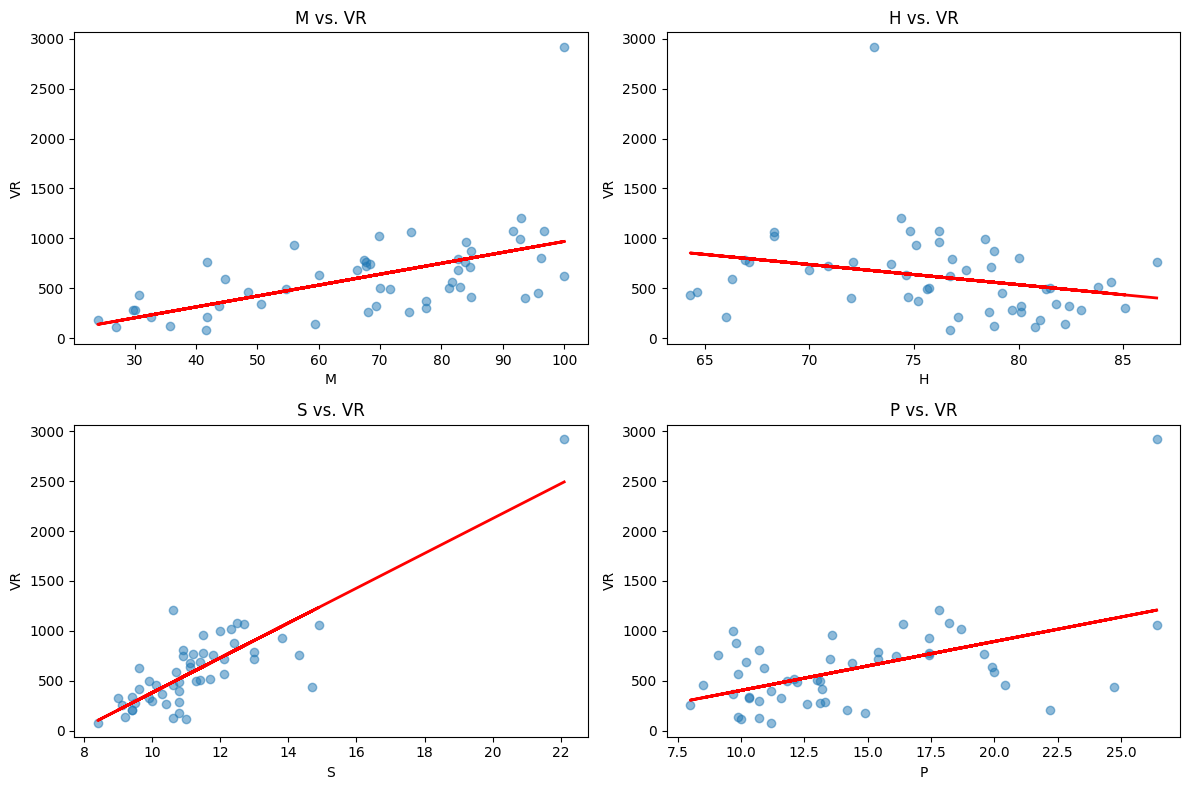

In [39]:
# Crear una figura con subtramas
plt.figure(figsize=(12, 8))

# Variables predictoras
predictors = X.columns

for i, predictor in enumerate(predictors):
    plt.subplot(2, 2, i + 1)
    
    plt.scatter(data[predictor], y, alpha=0.5)
    plt.title(f'{predictor} vs. VR')
    plt.xlabel(predictor)
    plt.ylabel('VR')
    
    coef = np.polyfit(data[predictor], y, 1)
    
    trendline = coef[1] + coef[0] * data[predictor]
    
    plt.plot(data[predictor], trendline, color='red', linewidth=2)

plt.tight_layout()
plt.show()

#### 2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Agregar una columna de unos para el término independiente (intercept)
X_train['intercept'] = 1

# Calcular los coeficientes utilizando la fórmula directa
coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print(coefficients)

[    7.54912771     7.69299876   137.04401833    36.30789512
 -2528.21724604]


El coeficiente para M (porcentaje de áreas metropolitanas) es positivo, lo que sugiere que un aumento en áreas metropolitanas está asociado con un aumento en crímenes violentos.

El coeficiente para H (porcentaje de personas con preparatoria terminada) es positivo, lo que indica que una mayor educación está relacionada con un aumento en crímenes violentos. Esto puede parecer contra intuitivo, pero puede ser el resultado de una mayor conciencia de los crímenes violentos en áreas con mayor educación. En nuestra grafica de dispersión, podemor que nuestra linea de regresión no se ajusta a los datos del todo.

El coeficiente para S (porcentaje de familias con un solo adulto como tutor) es muy positivo, lo que sugiere que esta estructura familiar está fuertemente relacionada con un aumento en crímenes violentos.

El coeficiente para P (porcentaje de personas con ingresos por debajo del nivel de pobreza) es positivo, lo que indica que la pobreza está asociada con un aumento en crímenes violentos.

El coeficiente del intercepto es negativo, pero su interpretación puede ser menos significativa en este contexto. Representa la tasa de crímenes violentos cuando todas las variables predictoras son cero, lo cual puede no ser prácticamente relevante.

#### 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE. 

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

def evaluate_model(model, X, y):
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

    r2_mean = np.mean(r2_scores)
    mse_mean = -np.mean(mse_scores)
    mae_mean = -np.mean(mae_scores)

    return r2_mean, mse_mean, mae_mean

r2_mean, mse_mean, mae_mean = evaluate_model(model, X_train, y_train)

print(f'R2 promedio: {r2_mean}')
print(f'MSE promedio: {mse_mean}')
print(f'MAE promedio: {mae_mean}')


R2 promedio: 0.6464126457508703
MSE promedio: 29133.65609805639
MAE promedio: 136.09884494041756


- El valor promedio de R2 es aproximadamente 0.6464. Esto significa que alrededor del 64.64% de la variabilidad en la variable de respuesta (crímenes violentos por cada 100,000 habitantes) puede ser explicada por las variables predictoras (porcentaje de áreas metropolitanas, porcentaje de personas con preparatoria terminada, porcentaje de familias con solo un miembro adulto como tutor y porcentaje con ingresos por debajo del nivel de pobreza)

- El valor promedio de MSE es aproximadamente 29133.66. Este valor representa la cantidad promedio de error cuadrático entre las predicciones del modelo y los valores reales de la variable de respuesta. En promedio, las predicciones del modelo están desviadas por alrededor de 29,133.66 unidades al cuadrado de la variable de respuesta.

- El valor promedio de MAE es aproximadamente 136.10. Esto representa la cantidad promedio de error absoluto entre las predicciones del modelo y los valores reales de la variable de respuesta. En promedio, las predicciones del modelo tienen un error absoluto de alrededor de 136.10 unidades en la variable de respuesta

#### 4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.

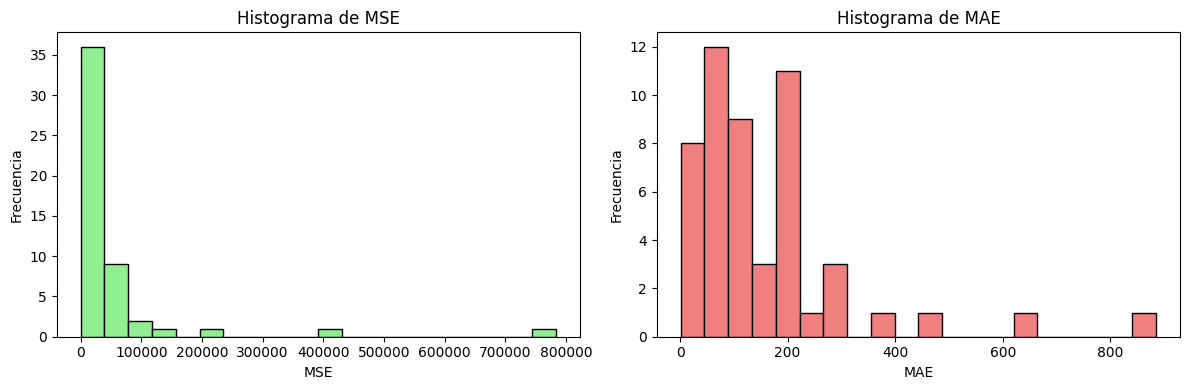

In [43]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse_scores = []
mae_scores = []

loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)

# Crear histogramas solo para MSE y MAE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mse_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de MSE')
plt.xlabel('MSE')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(mae_scores, bins=20, color='lightcoral', edgecolor='black')
plt.title('Histograma de MAE')
plt.xlabel('MAE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### 5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repite los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [44]:
# Agregar columnas para cuadrados de variables predictoras
for predictor in X.columns:
    data[f'{predictor}^2'] = data[predictor] ** 2

# Agregar columnas para productos entre pares de variables
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        col1 = X.columns[i]
        col2 = X.columns[j]
        data[f'{col1}x{col2}'] = data[col1] * data[col2]

# Dividir nuevamente los datos en predictoras y variable de respuesta
X_new = data.drop('VR', axis=1)
y_new = data['VR']


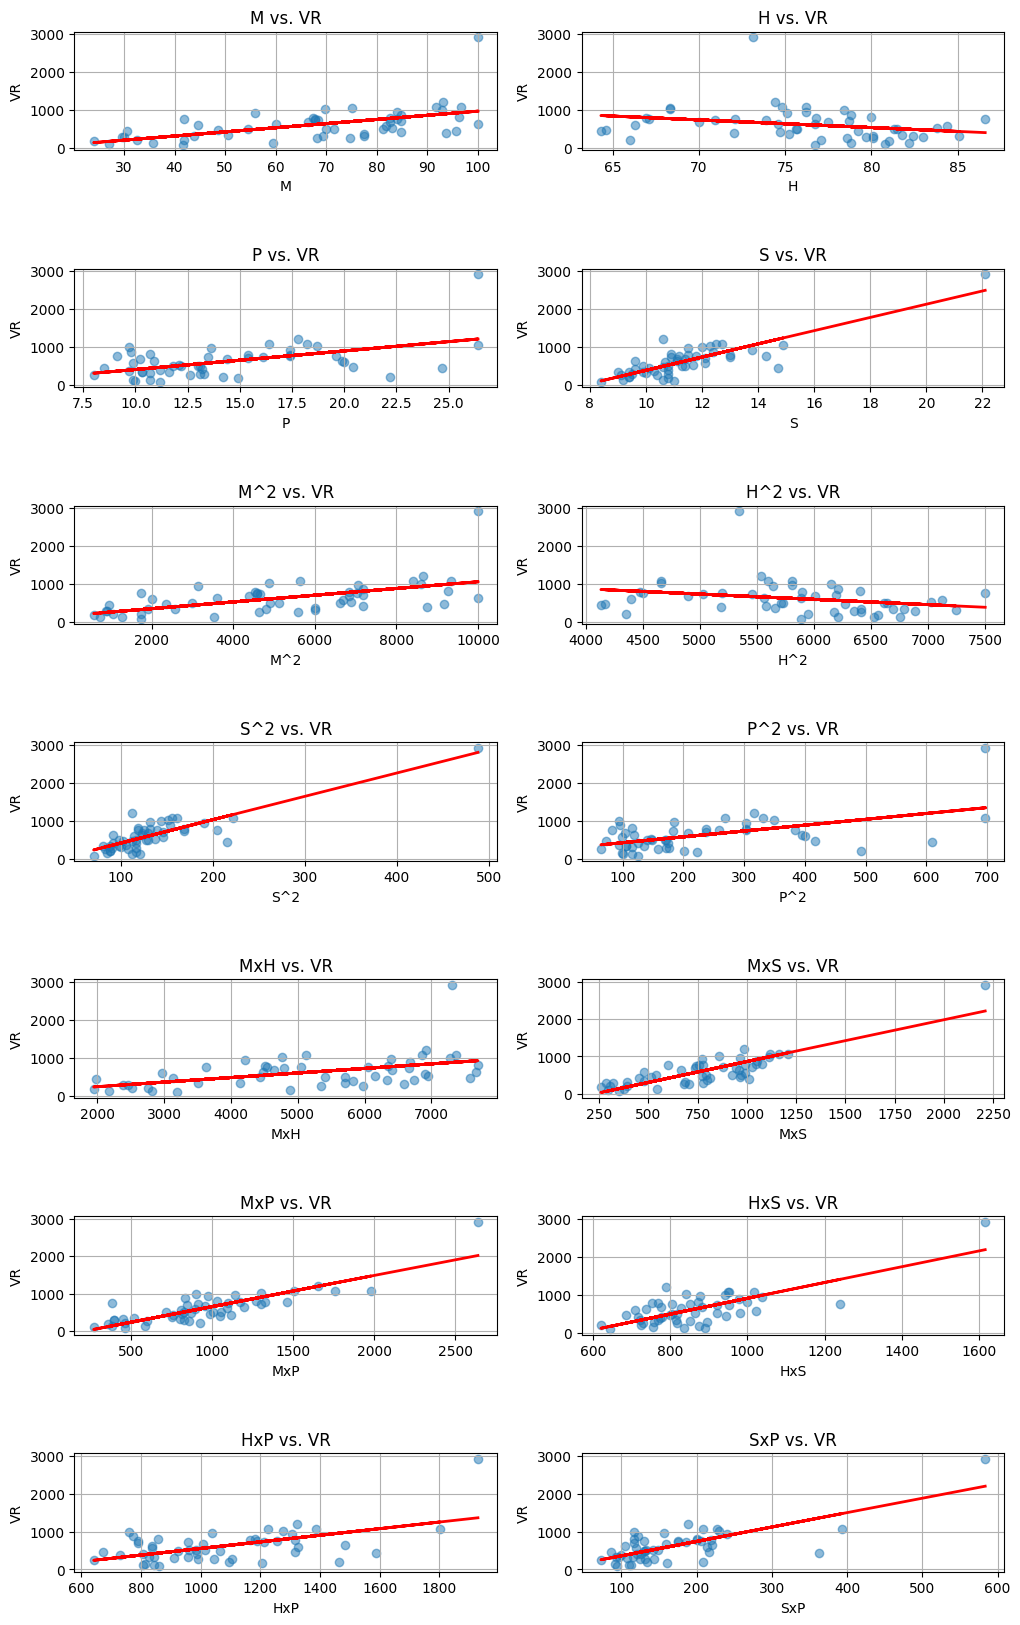

In [45]:
# Repetir los pasos 1, 2 y 3 con el nuevo conjunto de datos (X_new y y_new)
# Paso 1: Graficar las variables predictoras vs. la variable de respuesta

# Graficar cada variable predictora vs. la variable de respuesta

# Calcular el número de subplots necesario
num_predictors = len(X_new.columns)
num_rows = (num_predictors + 1) // 2

# Crear subplots con espacio adicional entre ellos
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 20))
plt.subplots_adjust(hspace=1)

# Iterar a través de las variables predictoras y crear gráficos
for i, predictor in enumerate(X_new.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Ajustar una línea de regresión lineal a los datos
    x_values = X_new[predictor]
    y_values = y_new
    slope, intercept = np.polyfit(x_values, y_values, 1)

    # Calcular los valores de y para la línea de tendencia
    trendline = slope * x_values + intercept

    # Graficar la línea de tendencia
    ax.plot(x_values, trendline, color='red', linewidth=2, label='Línea de Tendencia')

    # Resto del código para configurar el gráfico
    ax.scatter(x_values, y_values, alpha=0.5)
    ax.set_title(f'{predictor} vs. VR')
    ax.set_xlabel(predictor)
    ax.set_ylabel('VR')
    ax.grid(True)

# Eliminar subplots no utilizados si hay un número impar de predictores
if num_predictors % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.show()


In [46]:
# Paso 2: Calcular los coeficientes del modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model_new = LinearRegression()

# Ajustar el modelo a los datos
model_new.fit(X_new, y_new)

# Obtener los coeficientes del modelo
coefficients_new = model_new.coef_
intercept_new = model_new.intercept_

# Imprimir los coeficientes
print("Coeficientes:")
for predictor, coef in zip(X_new.columns, coefficients_new):
    print(f"{predictor}: {coef}")
print(f"Intercepto: {intercept_new}")

Coeficientes:
M: 33.99369737799533
H: 631.7893750338656
P: 822.0834925906174
S: 348.2303561541264
M^2: 0.021284271628815077
H^2: -2.811336644479386
S^2: 20.253875197777024
P^2: -4.470692558731862
MxH: -0.49662251823707493
MxS: 0.5972006969817727
MxP: 0.2924746633033166
HxS: -7.067607009898094
HxP: -6.9175702683706
SxP: -14.728004610754613
Intercepto: -33137.548068246295


In [47]:

# Paso 3: Evaluar el modelo con validación cruzada (R2, MSE, MAE)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir una función para evaluar el modelo con validación cruzada
def evaluate_model(model, X, y):
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

    # Calcular las métricas promedio
    r2_mean = np.mean(r2_scores)
    mse_mean = -np.mean(mse_scores)
    mae_mean = -np.mean(mae_scores)

    return r2_mean, mse_mean, mae_mean

# Evaluar el modelo con validación cruzada
r2_mean_new, mse_mean_new, mae_mean_new = evaluate_model(model_new, X_new, y_new)

print(f'R2 promedio (nuevo conjunto de datos): {r2_mean_new}')
print(f'MSE promedio (nuevo conjunto de datos): {mse_mean_new}')
print(f'MAE promedio (nuevo conjunto de datos): {mae_mean_new}')


R2 promedio (nuevo conjunto de datos): 0.4269898996380882
MSE promedio (nuevo conjunto de datos): 96980.98309552876
MAE promedio (nuevo conjunto de datos): 195.49216182001828


#### 6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado)

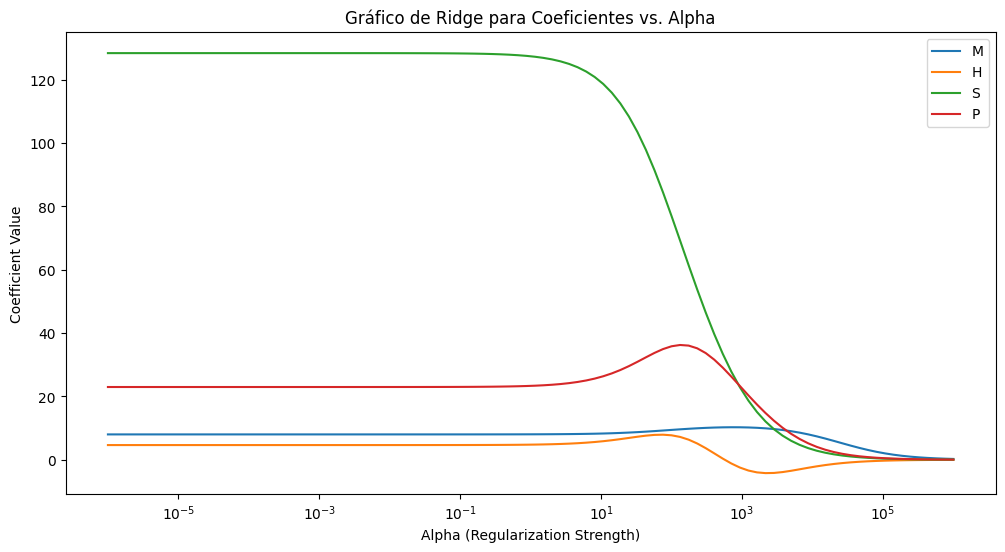

In [48]:
from sklearn.linear_model import Ridge

# Definir una gama de valores de alpha para Ridge
alphas = np.logspace(-6, 6, 100)

# Inicializar listas para almacenar los coeficientes de Ridge
coefs = []

# Ajustar modelos Ridge para cada valor de alpha y guardar los coeficientes
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Normalizar los datos
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Crear el gráfico de Ridge
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plotear los coeficientes en función de alpha
for i, predictor in enumerate(X.columns):
    plt.plot(alphas, [coef[i] for coef in coefs], label=predictor)

# Configurar etiquetas y título del gráfico
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Gráfico de Ridge para Coeficientes vs. Alpha')
plt.xscale('log')

# Mostrar una leyenda
plt.legend()
plt.axis('tight')
plt.show()


#### 7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

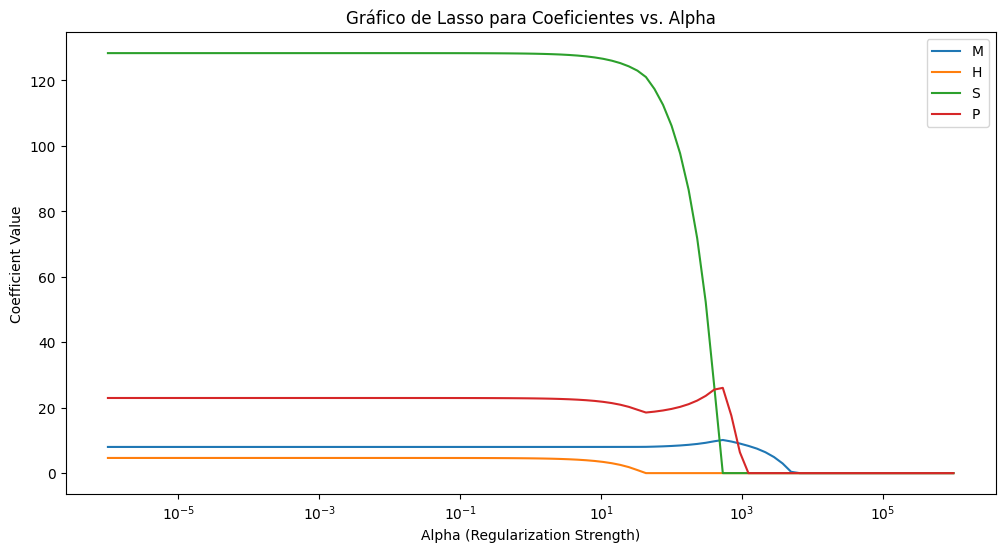

In [49]:
from sklearn.linear_model import Lasso

# Definir una gama de valores de alpha para Lasso
alphas = np.logspace(-6, 6, 100)

# Inicializar listas para almacenar los coeficientes de Lasso
coefs = []

# Ajustar modelos Lasso para cada valor de alpha y guardar los coeficientes
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# Crear el gráfico de Lasso
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plotear los coeficientes en función de alpha
for i, predictor in enumerate(X.columns):
    plt.plot(alphas, [coef[i] for coef in coefs], label=predictor)

# Configurar etiquetas y título del gráfico
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Gráfico de Lasso para Coeficientes vs. Alpha')
plt.xscale('log') 

# Mostrar una leyenda
plt.legend()
plt.axis('tight')
plt.show()

### 8. Desarrollar conclusiones

1. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?

Sí, considero que el modelo de regresión lineal es efectivo en este caso. Al analizar las gráficas de las variables predictoras contra la variable de respuesta (VR), se observa una relación lineal aparente. Además, los valores de R^2 indican que una parte significativa de la variabilidad en VR se explica mediante las variables predictoras.

2. ¿Observas una variabilidad importante en los valores de R^2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.

Observo una variabilidad importante en los valores de MSE y MAE durante la validación cruzada. Los histogramas de MSE y MAE están sesgados hacia la derecha, lo que indica que en algunos casos el modelo tiene un rendimiento significativamente peor que en otros. Esto sugiere que el modelo no se desempeña de manera consistente en todos los subconjuntos de datos, lo que puede deberse a diferencias en los datos o a la necesidad de mejorar el modelo.

3. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?

El modelo lineal parece ser más adecuado para los datos de criminalidad en este caso. Las gráficas de las variables predictoras contra VR no muestran una relación clara que sugiera un modelo cuadrático. Además, el modelo lineal es más simple y evita el riesgo de sobreajuste, lo que lo hace preferible en ausencia de evidencia sólida de no linealidad.

4. ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?

A lo que tengo entendido todas las variables son relevantes para el modelo.

5. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?
Si, en el modelo de regresión lineal original, encuentro una relación interesante entre los predictores y la variable de respuesta. Por ejemplo, noto que un aumento en el porcentaje de áreas metropolitanas (M) o el porcentaje de personas con ingresos por debajo del nivel de pobreza (P) se asocia con un aumento en la tasa de crímenes violentos. Además, el R^2 promedio de 0.6464 sugiere que el modelo puede explicar alrededor del 64.64% de la variabilidad en la tasa de crímenes violentos, lo que indica una relación significativa entre estos predictores y la variable de respuesta. Sin embargo en el coeficiente para H (porcentaje de personas con preparatoria terminada) es positivo, lo que indica que una mayor educación está relacionada con un aumento en crímenes violentos. Esto puede parecer contra intuitivo, pero puede ser el resultado de una mayor conciencia de los crímenes violentos en áreas con mayor educación. En nuestra grafica de dispersión, podemor que nuestra linea de regresión no se ajusta a los datos del todo.


# Ejercicio 2

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargamos los datos
df = pd.read_csv('./Archivos/life_expectancy_data.csv', index_col=0)

In [84]:
df = df.dropna()
df = df.drop(['Adult Mortality', 'Hepatitis B', 'Polio', 'GDP', 'Income composition of resources'], axis=1)

In [87]:
# Seleccionar las variables independientes y dependiente según tu matrícula
# Por ejemplo, para tu matrícula A01250513, Todas las variables, menos X1, X5, X9, X13, X17 
X = df.drop(['Life expectancy ', 'Status','Year'], axis=1)
y = df['Life expectancy ']

#### 1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el error cuadrado medio promedio
mse_scores = -scores
mean_mse = mse_scores.mean()
print("Error cuadrado medio promedio:", mean_mse)


Error cuadrado medio promedio: 21.70646063370006


#### 2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [90]:
df_corr = df.drop(['Status','Year'], axis=1)
correlations = df_corr.corr()['Life expectancy '].abs().sort_values(ascending=False)
selected_features = correlations[1:6]
print("Características seleccionadas por filtro:")
print(selected_features)


Características seleccionadas por filtro:
Schooling                0.727630
 HIV/AIDS                0.592236
 BMI                     0.542042
 thinness  1-19 years    0.457838
 thinness 5-9 years      0.457508
Name: Life expectancy , dtype: float64


#### 3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [91]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Crear un objeto SFS
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward', scoring='neg_mean_squared_error', cv=5)

# Ajustar el SFS al conjunto de datos
sfs.fit(X, y)

# Obtener las características seleccionadas
selected_features = list(X.columns[sfs.support_])
print("Características seleccionadas por SFS:")
print(selected_features)

Características seleccionadas por SFS:
['percentage expenditure', ' BMI ', 'Diphtheria ', ' HIV/AIDS', 'Schooling']


#### 4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Crear un objeto RFE con el modelo y el número de características a seleccionar
rfe = RFE(model, n_features_to_select=5)

# Ajustar RFE al conjunto de datos
rfe.fit(X, y)

# Obtener las características seleccionadas
selected_features = list(X.columns[rfe.support_])
print("Características seleccionadas por RFE:")
print(selected_features)

Características seleccionadas por RFE:
['infant deaths', 'Total expenditure', ' HIV/AIDS', ' thinness 5-9 years', 'Schooling']


#### 5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

In [93]:
from sklearn.neighbors import KNeighborsRegressor

# Crear un modelo KNN
knn_model = KNeighborsRegressor()

# Realizar validación cruzada con KNN
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el error cuadrado medio promedio
mean_knn_mse = -knn_scores.mean()
print("Error cuadrado medio promedio con KNN:", mean_knn_mse)

Error cuadrado medio promedio con KNN: 94.20158264492954


#### 6. Modelo de regresión con árbol de decisión y variable categórica "Status"

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Codificar la variable categórica "Status"
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

# Seleccionar las variables independientes y dependiente
X_tree = df.drop(columns=['Life expectancy '])
y_tree = df['Life expectancy ']

# Crear un modelo de árbol de decisión
tree_model = DecisionTreeRegressor()

# Realizar validación cruzada con el árbol de decisión
tree_scores = cross_val_score(tree_model, X_tree, y_tree, cv=5, scoring='neg_mean_squared_error')

# Calcular el error cuadrado medio promedio
mean_tree_mse = -tree_scores.mean()
print("Error cuadrado medio promedio con árbol de decisión:", mean_tree_mse)

Error cuadrado medio promedio con árbol de decisión: 22.09357398913144


¿Consideras que el modelo de regresión lineal es adecuado para los datos? ¿Por qué?

Sí, el modelo de regresión lineal parece ser adecuado para estos datos debido a su error cuadrado medio promedio relativamente bajo (21.71). Esto sugiere que un modelo lineal puede capturar bien la relación entre las variables independientes y la esperanza de vida.


¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?

En este caso, el método de selección de características secuencial hacia adelante (SFS) parece funcionar bien, ya que seleccionó características relevantes y logró un bajo error cuadrado medio promedio. Además, el método RFE (selección de características recursivas) también seleccionó características importantes.


Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevante observas de dichas características?

Las características seleccionadas varían según el método, pero algunas de las características que se destacan incluyen 'Schooling', 'HIV/AIDS', 'BMI', 'Diphtheria', 'percentage expenditure', 'infant deaths' y 'Total expenditure'. Estas características parecen tener una influencia significativa en la esperanza de vida.


¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?

No, el modelo de regresión no lineal (K-vecinos más cercanos) obtuvo un error cuadrado medio promedio significativamente más alto (94.20) en comparación con el modelo de regresión lineal (21.71). Esto sugiere que, en este caso, un modelo lineal se ajusta mejor a los datos que un modelo no lineal.


¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?

Sí, al agregar la variable categórica 'Status' al modelo de árbol de decisión, el error cuadrado medio promedio aumentó ligeramente (22.09) en comparación con el modelo de regresión lineal (21.71). Esto sugiere que la variable 'Status' podría no estar relacionada de manera significativa con la esperanza de vida y, en realidad, puede haber contribuido a un rendimiento ligeramente peor en la predicción.


¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.

Sí, a partir de los resultados, podemos concluir que un modelo de regresión lineal es una opción adecuada para predecir la esperanza de vida en función de las características proporcionadas. La selección de características es crucial, y tanto los métodos de filtro como los métodos de wrapper pueden ser efectivos para identificar las variables más relevantes. Sin embargo, un modelo no lineal como K-vecinos más cercanos no funcionó tan bien en este conjunto de datos en particular.